<a href="https://colab.research.google.com/github/darrickpang/Email/blob/master/Darrick_Pang_data_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Exploratory Data Analysis

In [ ]:
# Remove all null/nan values then print the first 5 rows
df = pd.read_csv('CarPrice_Assignment-2.csv')
df = df.dropna()
df = df.drop(['car_ID'], axis=1)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Descriptive statistics
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


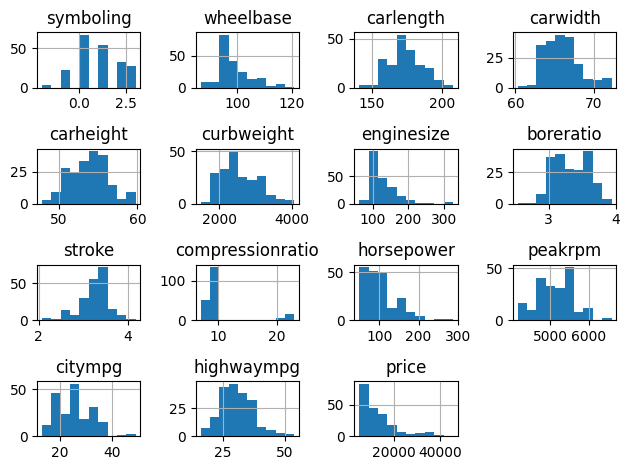

In [ ]:
# Plot histogram for all data points
df.hist()
plt.tight_layout()
plt.show()

We can see the histograms for price, wheel-base, width, normalized-losses, and num-of-doors should be given a log transformation because they are skewed. We can see from the descriptive statistics that the mean and median have a large enough difference to cause a skew. Applying a log transformation would reduce the skewness and make the distributions more normal.

## Normalization

In [ ]:
# Normalization
df_numeric = df.select_dtypes(include=np.number)
names = df_numeric.columns
scaler = Normalizer().fit(df_numeric)
normalized = scaler.transform(df_numeric)
df_normalized = pd.DataFrame(normalized, columns=names)

In [ ]:
df_normalized.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000205,0.006061,0.011548,0.004385,0.003338,0.174308,0.008893,0.000237,0.000183,0.000616,0.007593,0.342048,0.001437,0.001847,0.923188
1,0.000172,0.005083,0.009684,0.003678,0.002800,0.146182,0.007458,0.000199,0.000154,0.000516,0.006368,0.286857,0.001205,0.001549,0.946627
2,0.000057,0.005408,0.009798,0.003749,0.002999,0.161562,0.008699,0.000153,0.000199,0.000515,0.008813,0.286153,0.001087,0.001488,0.944304
3,0.000132,0.006575,0.011635,0.004361,0.003577,0.153968,0.007181,0.000210,0.000224,0.000659,0.006720,0.362355,0.001581,0.001976,0.919064
4,0.000108,0.005369,0.009538,0.003586,0.002933,0.152524,0.007345,0.000172,0.000184,0.000432,0.006211,0.297055,0.000972,0.001188,0.942475


In [ ]:
df_normalized.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.000070,0.007892,0.013826,0.005290,0.004340,0.193920,0.009359,0.000265,0.000263,0.000813,0.007521,0.415664,0.002191,0.002647,0.870642
std,0.000095,0.002549,0.004264,0.001757,0.001508,0.043840,0.002035,0.000084,0.000092,0.000407,0.001587,0.151307,0.001206,0.001374,0.080255
min,-0.000140,0.002380,0.004352,0.001573,0.001210,0.074466,0.004637,0.000083,0.000073,0.000175,0.003787,0.098306,0.000306,0.000350,0.678807
25%,0.000000,0.005967,0.010545,0.003856,0.003133,0.166376,0.007853,0.000196,0.000184,0.000530,0.006419,0.295258,0.001149,0.001487,0.813478
50%,0.000084,0.008283,0.014707,0.005538,0.004488,0.205134,0.009775,0.000280,0.000282,0.000769,0.007712,0.421943,0.002110,0.002610,0.880856
75%,0.000128,0.009987,0.017441,0.006677,0.005670,0.225067,0.010813,0.000328,0.000342,0.000991,0.008506,0.535636,0.003106,0.003589,0.939146
max,0.000296,0.012830,0.021334,0.008609,0.007307,0.296763,0.014530,0.000491,0.000422,0.002487,0.011545,0.693899,0.006349,0.007159,0.991796


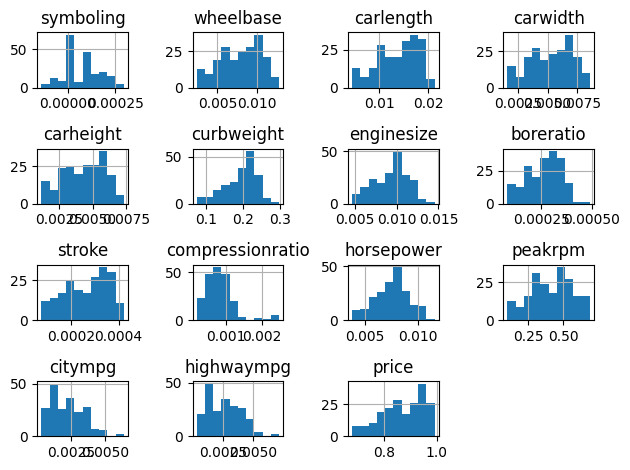

In [ ]:
df_normalized.hist()
plt.tight_layout()
plt.show()

## Standardization

In [ ]:
# Standardization
scaler2 = StandardScaler().fit(df_numeric)
standard = scaler2.transform(df_numeric)
df_standard = pd.DataFrame(standard, columns=names)

In [ ]:
df_standard.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


In [ ]:
df_standard.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,4.332578e-17,-1.291108e-15,3.656696e-15,1.089643e-15,-5.372396e-16,1.126470e-16,3.466062e-17,2.252940e-15,2.062307e-15,-3.639365e-16,1.819683e-16,2.772850e-16,1.104807e-16,1.473076e-16,1.992986e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.281433e+00,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00,-1.023762e+00
25%,-6.714717e-01,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01,-6.887281e-01
50%,1.335090e-01,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01,-3.741476e-01
75%,9.384897e-01,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01,4.048375e-01
max,1.743470e+00,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00,4.030858e+00


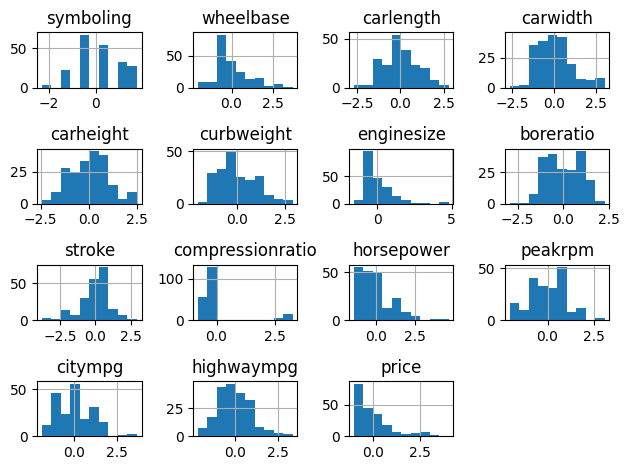

In [ ]:
df_standard.hist()
plt.tight_layout()
plt.show()

Normalization and standardization are applied to reduce skewness and make the distributions into a more normal shape or bell-shaped because this generally improves model performance. We can see normalization has made price, horsepower, number of doors more Gaussian. However, it made others such as length and height more skewed. Standardization shifts the mean to 0 with a standard deviation of 1. It seems length and height are better suited in standardization than normalization because it preserves their Gaussian curve.

## Heat map correlation

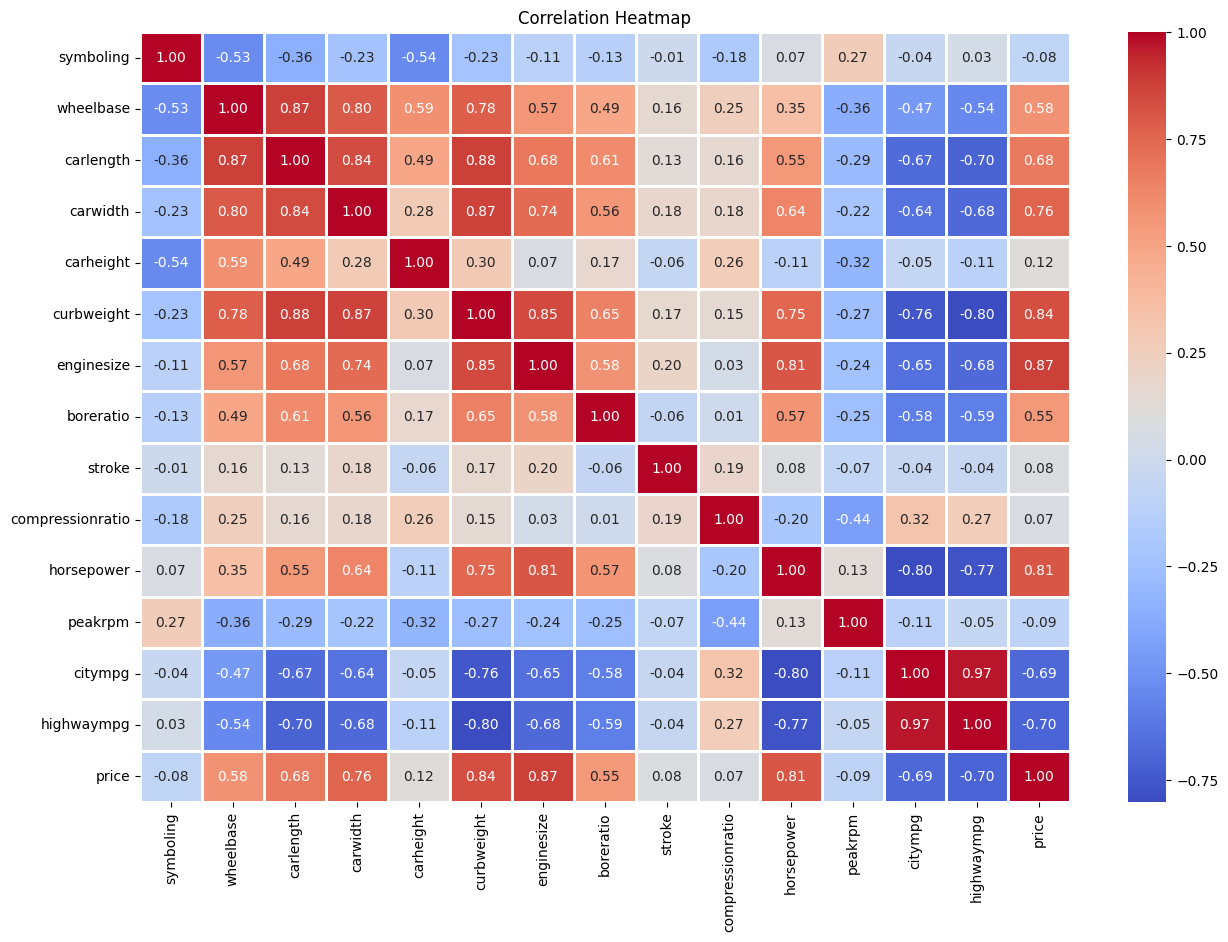

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

## Scatter plots

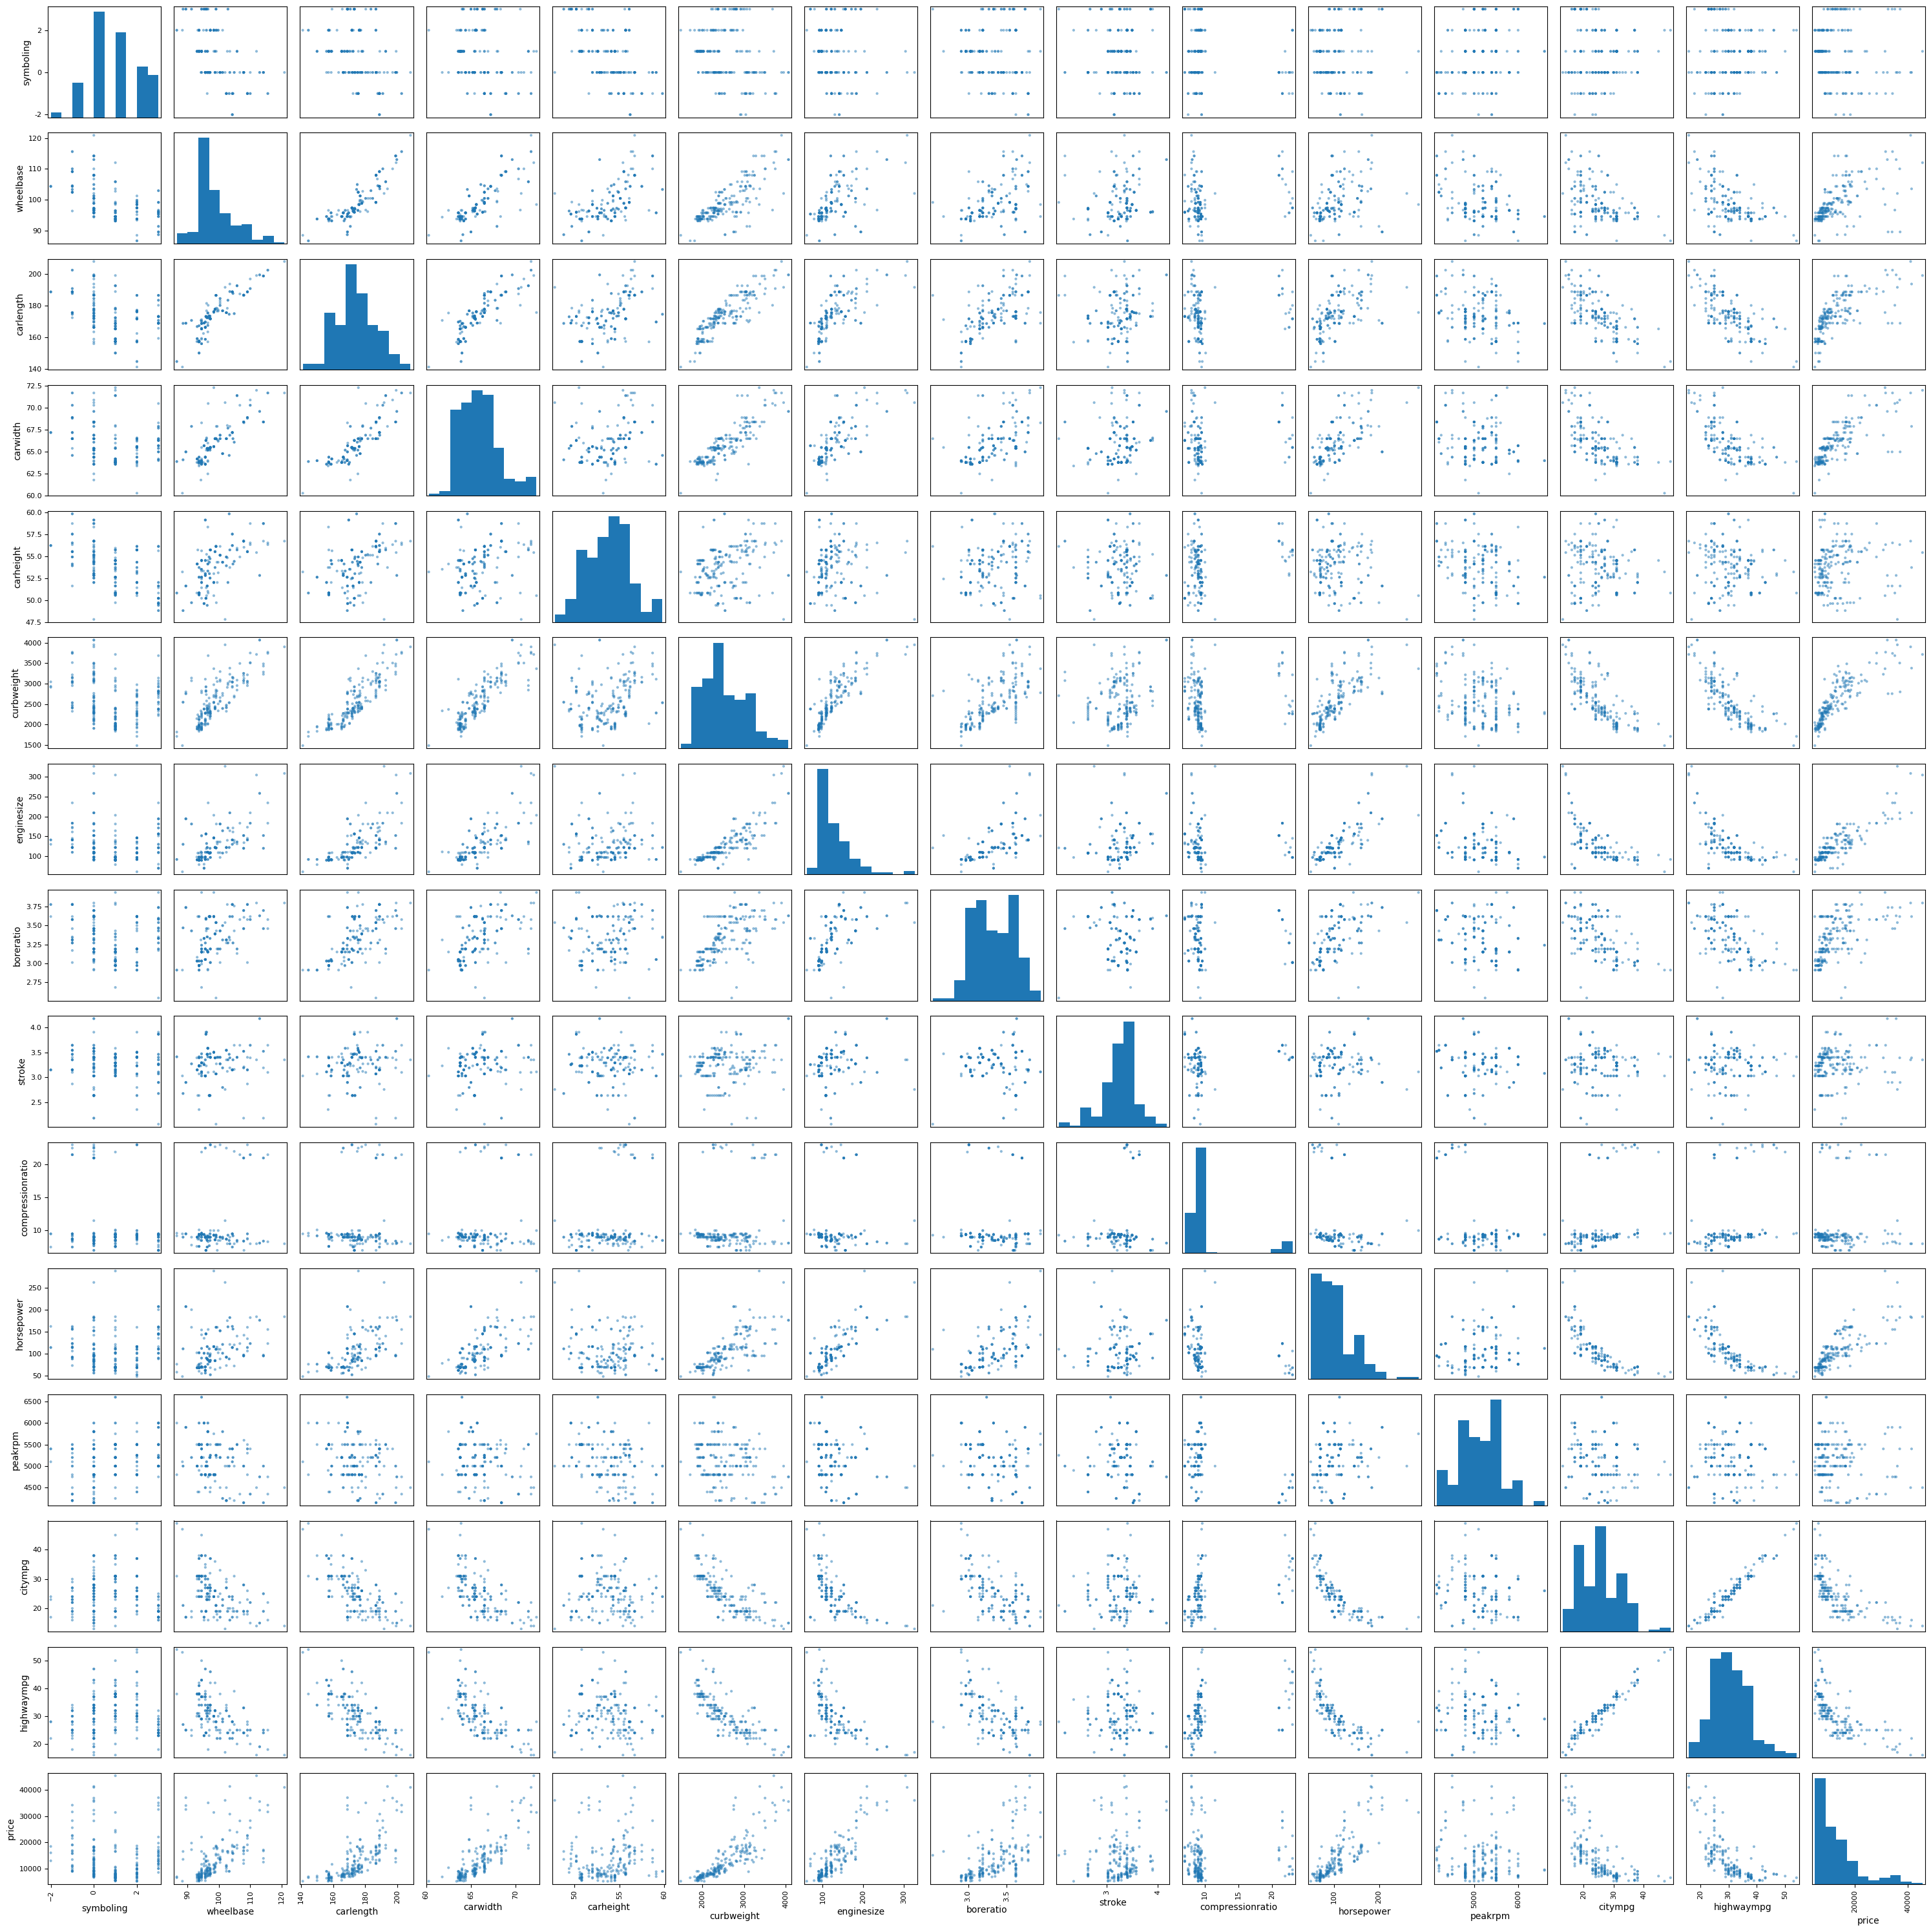

In [ ]:
scatter_matrix(df, figsize=(30, 30))
plt.tight_layout()
plt.show()

We can identify linear and nonlinear relationships.
1. Linear:
  1. city-mpg/highway-mpg
  2. curb-weight/horsepower
  3. price/width
2. Nonlinear:
  1. horsepower/highway-mpg
  2. horsepower/city-mpg
  3. width/length.

# Linear Regression

## RFE

In [ ]:
array = df_numeric.values
# print(array)
X = array[:,0:14]
Y = array[:,14]
# print(X)
# print(Y)
NUM_FEATURES = 14 # this is kind of arbitrary but the idea should come by observing the scatter plots and cor
model = LinearRegression()
for i in range(NUM_FEATURES, 0, -1):
  print(i)
  rfe = RFE(model, n_features_to_select=i)
  fit = rfe.fit(X, Y)
  print("Num Features:", fit.n_features_)
  print("Selected Features:", fit.support_)
  print("Feature Ranking:", fit.ranking_)
  # calculate the score for the selected featuresIn [25]:
  score = rfe.score(X,Y)
  print("Model Score with selected features is: ", score)
  print()

14
Num Features: 14
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Model Score with selected features is:  0.851868852264291

13
Num Features: 13
Selected Features: [ True  True  True  True  True False  True  True  True  True  True  True
  True  True]
Feature Ranking: [1 1 1 1 1 2 1 1 1 1 1 1 1 1]
Model Score with selected features is:  0.8509564700805642

12
Num Features: 12
Selected Features: [ True  True  True  True  True False  True  True  True  True  True False
  True  True]
Feature Ranking: [1 1 1 1 1 3 1 1 1 1 1 2 1 1]
Model Score with selected features is:  0.8420673623722005

11
Num Features: 11
Selected Features: [ True  True  True  True  True False  True  True  True  True False False
  True  True]
Feature Ranking: [1 1 1 1 1 4 1 1 1 1 2 3 1 1]
Model Score with selected features is:  0.8283703354875679

10
Num Features: 10
Selected Features: [ True False  True  True  True

## Ridge and Lasso Regularization

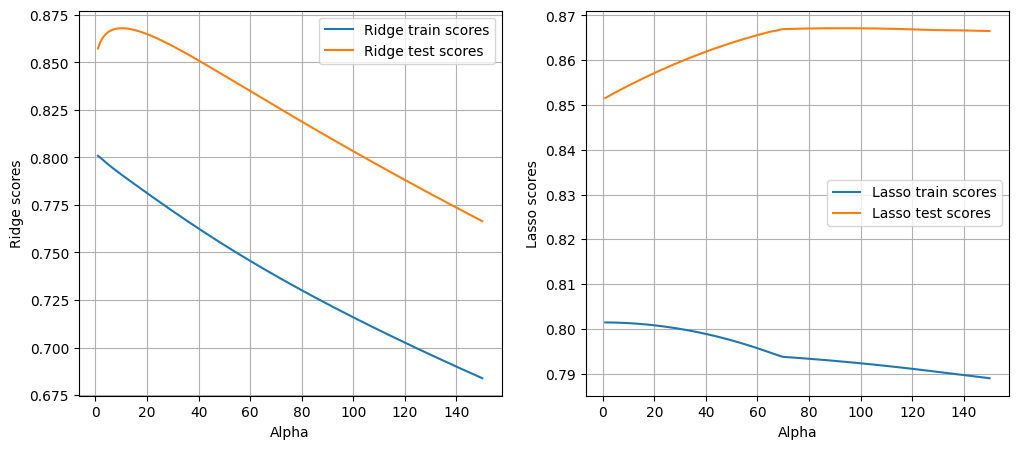

In [ ]:
df_X = df[['symboling', 'carwidth', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'citympg', 'highwaympg']]
df_Y = df_numeric['price']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = range(1, 151)

ridge_train = []
ridge_test = []
lasso_train = []
lasso_test = []

for alpha in alphas:

    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_train.append(ridge.score(X_train_scaled, y_train))
    ridge_test.append(ridge.score(X_test_scaled, y_test))

    # Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_train.append(lasso.score(X_train_scaled, y_train))
    lasso_test.append(lasso.score(X_test_scaled, y_test))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_train, label="Ridge train scores")
plt.plot(alphas, ridge_test, label="Ridge test scores")
plt.xlabel("Alpha")
plt.ylabel("Ridge scores")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_train, label="Lasso train scores")
plt.plot(alphas, lasso_test, label="Lasso test scores")
plt.xlabel("Alpha")
plt.ylabel("Lasso scores")
plt.grid(True)
plt.legend()
plt.show()

From the graphs, we can see there is not much overfitting, and it seems Ridge is a better choice than Lasso because both the train and test values are converging for Ridge but not much for Lasso. Judging by the graph, we can see the Ridge difference drops from about 0.25 to 0.08. Meanwhile, Lasso difference drops from 0.25 to about 0.17 and stays consistent at 0.17. The converging values between train and test means Ridge is correcting the overfitting but not for Lasso. Maybe the reason why Lasso is not as good of a choice is that the number of features seem to be dropped quickly as alpha grows. That means Lasso is not able to fix the overfitting issue. So the conclusion is Ridge is the better choice than Lasso.